
# Finance Project

Data analysis of the following bank stocks from 1st Jan 2006 to 1st Jan 2016:
* Bank of America (BAC)
* CitiGroup	(C)
* Goldman Sachs (GS)
* JPMorgan Chase (JPM)
* Morgan Stanley (MS)
* Wells Fargo (WFC)

Finance data from Yahoo Finance - no API key required.

In [80]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import plotly
import seaborn as sns
import datetime
import cufflinks as cf
cf.go_offline()
%matplotlib inline
sns.set_style('whitegrid')


In [2]:
# IMPORT BANK DATA
BAC = web.DataReader('BAC', 'yahoo', start='2006-01-01', end='2016-01-01')
C = web.DataReader('C', 'yahoo', start='2006-01-01', end='2016-01-01')
GS = web.DataReader('GS', 'yahoo', start='2006-01-01', end='2016-01-01')
JPM = web.DataReader('JPM', 'yahoo', start='2006-01-01', end='2016-01-01')
MS = web.DataReader('MS', 'yahoo', start='2006-01-01', end='2016-01-01')
WFC = web.DataReader('WFC', 'yahoo', start='2006-01-01', end='2016-01-01')

In [3]:
# LIST OF TICKER SYMBOLS
ticker = ['BAC','C','GS','JPM','MS','WFC']
ticker.sort()

In [4]:
# CONCATENATE DATA FRAME AND APPLY COLUMN NAMES
df = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=ticker)
df.columns.names = ['Bank Ticker','Stock Info']
df.head(5)

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      \
Stock Info   Adj Close        High         Low        Open       Close   
Date                                                                     
2006-01-03   33.777523  493.799988  481.100006  490.000000  492.899994   
2006-01-04   33.418781  491.000000  483.500000  488.600006  483.799988   
2006-01-05   33.461815  487.799988  484.000000  484.399994  486.200012   
2006-01-06   33.411606  489.000000  482.000000  488.799988  486.200012   
2006-01-09   33.433125  487.399994  483.000000  486.000000  483.899994   

Bank Ticker    ...             MS                                         WFC  \
Stock Info     ...           Open      Close     Volume  Adj Close       High   
Date           ...                                                              
2006-01-03     ...      57.169998  58.310001  5377000.0  33.464508  31.975000   
2006-01-04     ...      58.700001  58.349998  7977800.0  33.487461  31.820000   
2006-01-05     ...      58.549999  58.509998  5778000.0  33.579288  31.555000   
2006-01-06     ...      58.770000  58.570000  6889800.0  33.613728  31.775000   
2006-01-09     ...      58.630001  59.189999  4144500.0  33.969547  31.825001   

Bank Ticker                                                          
Stock Info         Low       Open      Close      Volume  Adj Close  
Date                                                                 
2006-01-03   31.195000  31.600000  31.900000  11016400.0  20.353485  
2006-01-04   31.365000  31.799999  31.530001  10870000.0  20.117413  
2006-01-05   31.309999  31.500000  31.495001  10158000.0  20.095072  
2006-01-06   31.385000  31.580000  31.680000   8403800.0  20.213118  
2006-01-09   31.555000  31.674999  31.674999   5619600.0  20.209929  

[5 rows x 36 columns]

# Exploratory Data Analysis (EDA)

In [17]:
# MAX CLOSING PRICE FOR EACH STOCK
df.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [26]:
# CALCULATE PERCENTAGE CHANGE AND ADD TO NEW DATA FRAME
returns = pd.DataFrame()
for tick in ticker:
    returns[tick+' Return'] = df[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


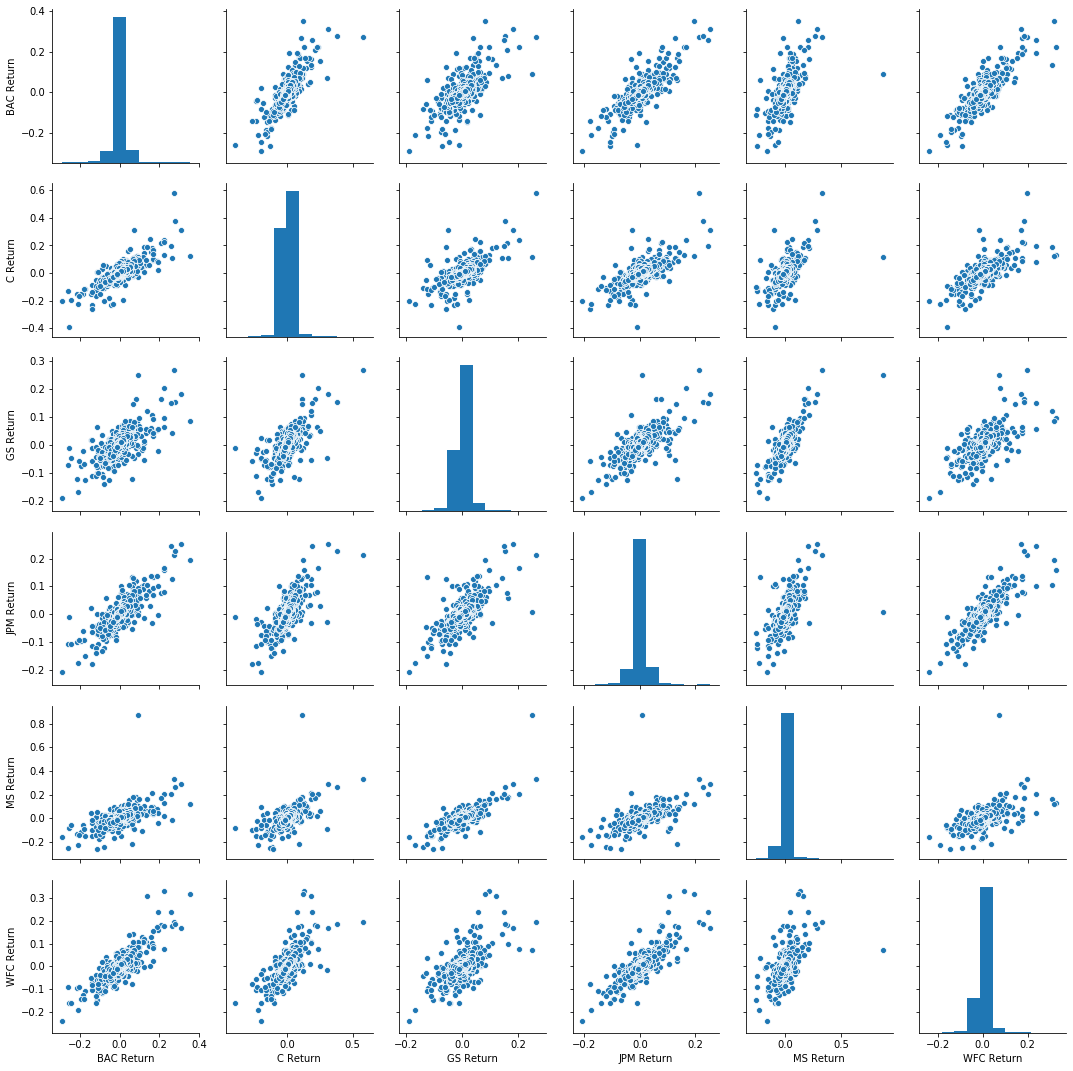

In [28]:
# PAIRPLOT OF THE DATAFRAME
sns.pairplot(returns[1:])

In [60]:
# LOWEST PERCENTAGE CHANGE VALUES OF EACH STOCK AND CORRESPONDING DATES
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [61]:
# LOWEST PERCENTAGE CHANGE VALUES OF EACH STOCK AND CORRESPONDING DATES
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [63]:
# STANDARD DEVIATIONS OF EACH STOCK ACROSS ALL DATES
returns.std()

#CITIGROUP RISKIEST STOCK WITH LARGEST STD DEVIATION

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [66]:
# STANDARD DEVIATIONS OF EACH STOCK IN 2015
returns.loc['2015-01-01':'2015-12-31'].std()

#MORGAN STANLEY RISKIEST STOCK IN 2015 WITH LARGEST STD DEVIATION

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

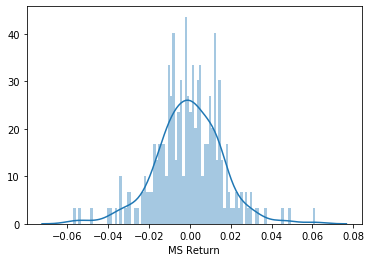

In [76]:
# DIST PLOT OF MORGAN STANLEY 2015 RETURNS 
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],bins=100)

C:\Users\Jujar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


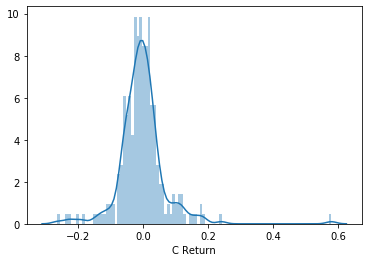

In [79]:
# DIST PLOT OF CITIGROUP 2008 RETURNS 
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],bins=100)

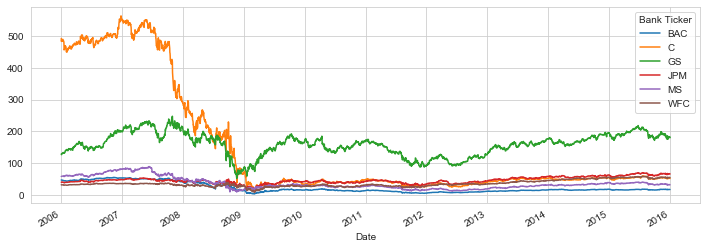

In [95]:
# LINE PLOT OF CLOSE PRICE FOR EACH BANK DURING THE PERIOD
df.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(12,4))

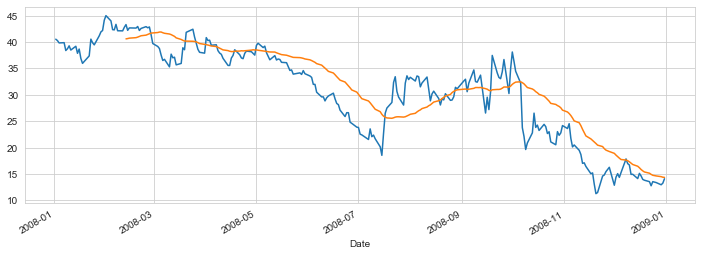

In [97]:
# 30 DAY ROLLING AVERAGE FOR BANK OF AMERICA STOCK PRICE IN 2008
df.loc['2008-01-01':'2008-12-31']['BAC']['Close'].plot(figsize=(12,4))
df.loc['2008-01-01':'2008-12-31']['BAC']['Close'].rolling(30).mean().plot(figsize=(12,4))

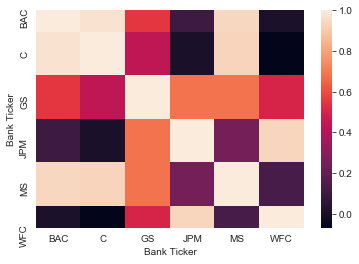

In [100]:
# HEATMAP OF CORRELATION BETWEEN STOCKS CLOSE PRICE
sns.heatmap(df.xs(key='Close',axis=1,level='Stock Info').corr())